In [1]:
import numpy as np 
from PIL import Image
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's architecture.
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [4]:
def load_image(image_path):
    
    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

In [5]:
def get_image_embeddings(object_image : image):

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [6]:
def get_similarity_score(first_image : str, second_image : str):
    
    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

In [7]:
def show_image(image_path, title):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.title(title)
  plt.show()

In [8]:
def get_image_path(image_num):
    return 'photos/'+str(image_num)+'.jpg'

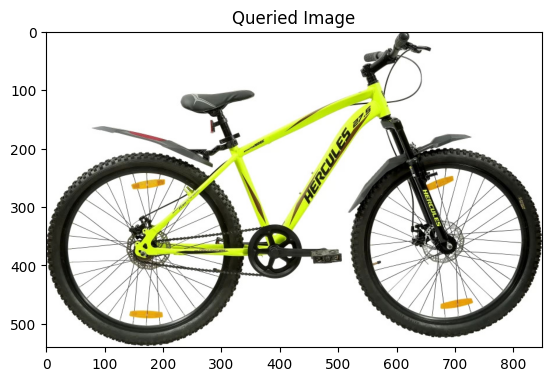

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
ref = 61 # Reference Image Number to be matched among the data
ref_img = get_image_path(ref)

show_image(ref_img, "Queried Image")

scores = []

for i in range(1, 63) :
  if(i != ref):
    test_img = get_image_path(i)
    similarity_score = get_similarity_score(ref_img, test_img)
    scores.append([i, similarity_score[0]])

In [10]:
scores = np.array(scores)
sorted_indices = np.argsort(scores[:, 1])[::-1]
sorted_scores = scores[sorted_indices]
print(sorted_scores) # Similarity scores in descending order

[[62.          0.80009657]
 [44.          0.72319478]
 [13.          0.71805763]
 [11.          0.69996727]
 [ 5.          0.67699385]
 [22.          0.61239451]
 [60.          0.51968801]
 [21.          0.5111503 ]
 [53.          0.5034107 ]
 [57.          0.48254085]
 [25.          0.47417516]
 [36.          0.46855468]
 [41.          0.46554512]
 [27.          0.46310449]
 [ 8.          0.45654455]
 [17.          0.45107484]
 [47.          0.44347873]
 [37.          0.44245666]
 [ 6.          0.43865129]
 [51.          0.42842156]
 [29.          0.4195984 ]
 [54.          0.41318193]
 [35.          0.41199601]
 [55.          0.40931922]
 [52.          0.40879339]
 [19.          0.40471619]
 [45.          0.40313205]
 [38.          0.39613771]
 [10.          0.38881966]
 [23.          0.38594377]
 [20.          0.38496658]
 [46.          0.38457942]
 [58.          0.38107383]
 [12.          0.38095683]
 [40.          0.3799068 ]
 [30.          0.36686644]
 [ 1.          0.36626607]
 

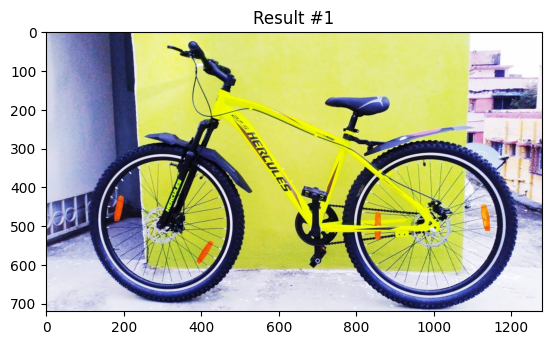

0.8000965714454651


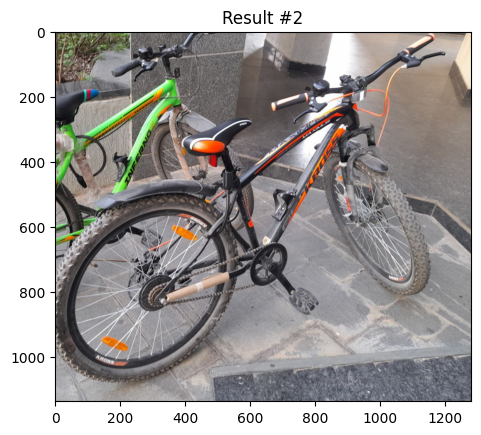

0.7231947779655457


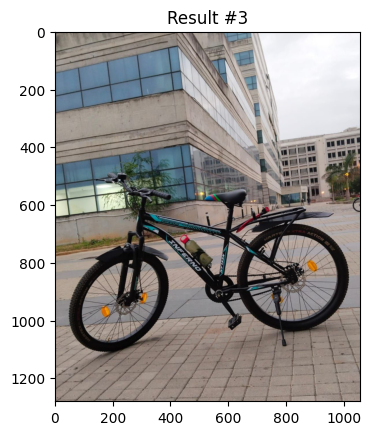

0.7180576324462891


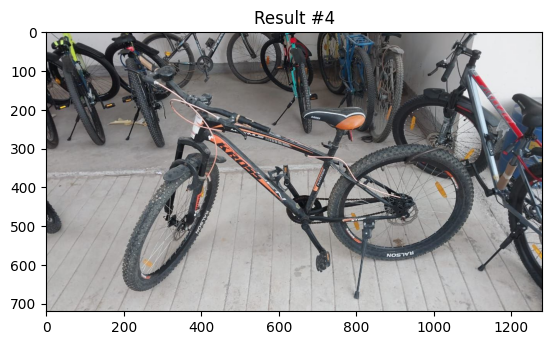

0.6999672651290894


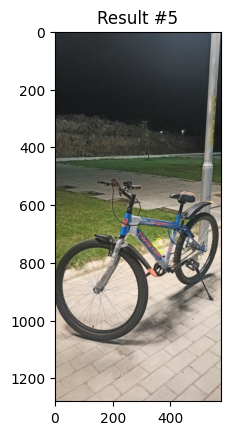

0.6769938468933105


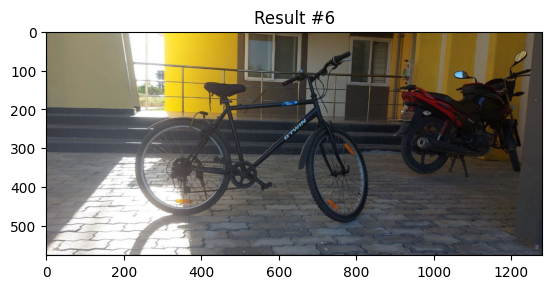

0.6123945116996765


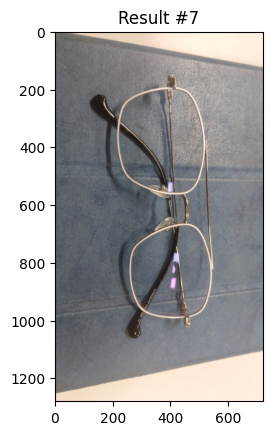

0.5196880102157593


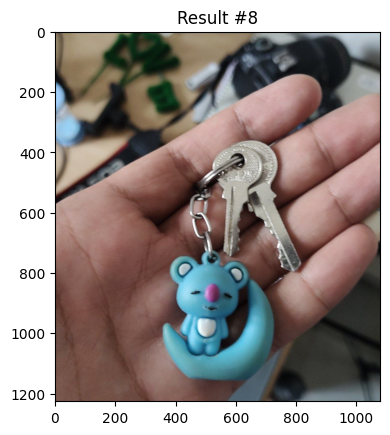

0.5111503005027771


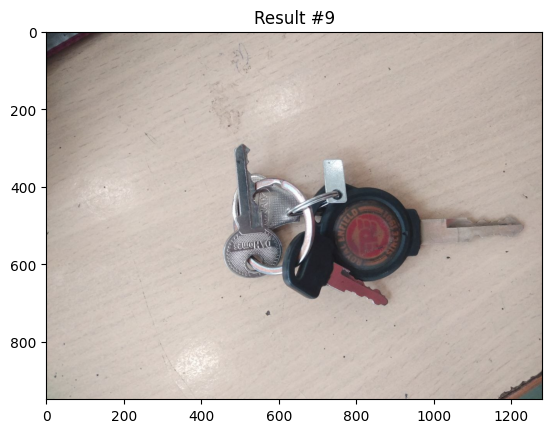

0.5034106969833374


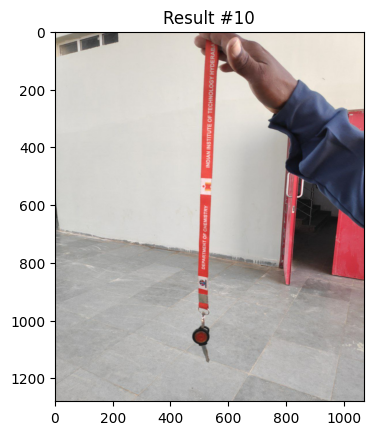

0.4825408458709717


In [12]:
# Top 10 found items based on similarity score
for i in range(10):
    res_image = get_image_path(int(sorted_scores[i][0]))
    score = sorted_scores[i][1]
    show_image(res_image, f"Result #{i+1}")
    print(score)